## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score, KFold, RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
from sklearn.dummy import DummyClassifier
from scipy.stats import uniform, randint
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer, f1_score
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

Reading the data

In [2]:
df=pd.read_csv("Group_4_data_cleaned.csv",index_col=0)
df.head()

,height,length,area,eccen,p_black,p_and,mean_tr,blackpix,blackand,wb_trans,y
0,5.0,7,35,1.400,0.400,0.657,2.33,14,23.0,6.0,1
1,6.0,7,42,1.167,0.429,0.881,3.60,18,37.0,5.0,1
2,6.0,18,108,3.000,0.287,0.741,4.43,31,80.0,7.0,1
3,5.0,7,35,1.400,0.371,0.743,4.33,13,26.0,3.0,1
4,6.0,3,18,0.500,0.500,0.944,2.25,9,17.0,4.0,1


In [3]:
print(df.describe())
print(df.info())

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

In [4]:
output_dict={1:'text',2:'horizontal line',3:'picture',4:'vertical line',5:'graphic'}
df["y"].value_counts().rename(index=output_dict)

text               4913
horizontal line     329
graphic             115
vertical line        88
picture              28
Name: y, dtype: int64

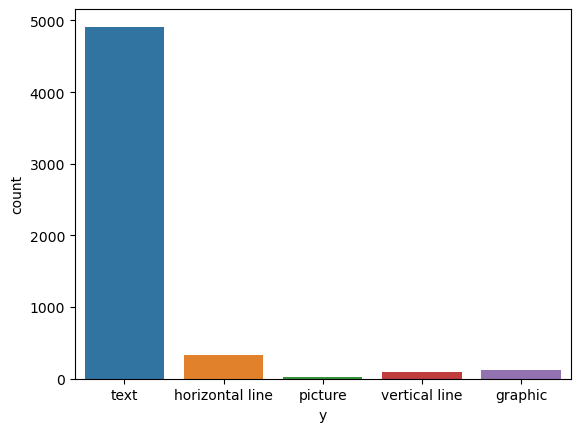

In [5]:
ax=sns.countplot(df['y'])
ax.set(xticklabels=output_dict.values())
plt.show()

## Model Building

In [6]:
X=df.iloc[:, :-1]
y=df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
y_train.value_counts()

1    3934
2     255
5      98
4      69
3      22
Name: y, dtype: int64

In [9]:
precision=[]
recall=[]
f1_score=[]

## Naive method using Majority Class Classifier

In [10]:
clf = DummyClassifier(strategy='most_frequent')
clf.fit(X_train_scaled, y_train)

DummyClassifier(strategy='most_frequent')

In [11]:
y_pred = clf.predict(X_test_scaled)
# y_pred=[1 for i in range(len(y_test))]

In [12]:
ac1 = accuracy_score(y_test,y_pred)
ac1

0.8940639269406393

In [13]:
cm1=confusion_matrix(y_test, y_pred)
cm1

array([[979,   0,   0,   0,   0],
       [ 74,   0,   0,   0,   0],
       [  6,   0,   0,   0,   0],
       [ 19,   0,   0,   0,   0],
       [ 17,   0,   0,   0,   0]])

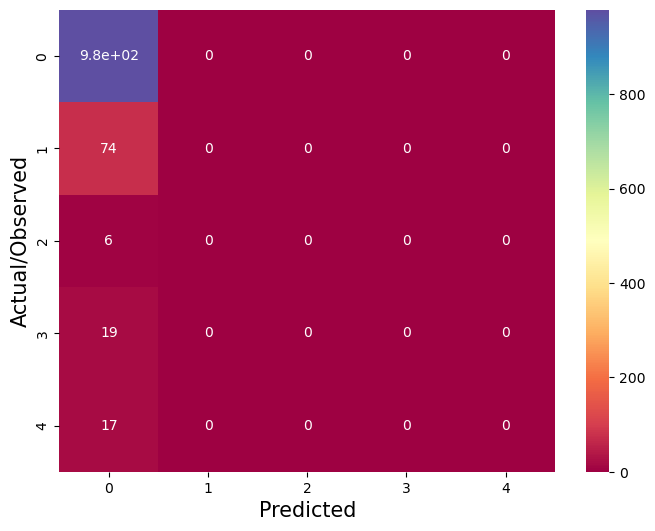

In [14]:
plt.figure(figsize = (8,6))

sns.heatmap(cm1, 
            annot=True, 
            cmap="Spectral")
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual/Observed', fontsize=15);

In [15]:
print(classification_report(y_test, y_pred))

report=classification_report(y_pred,y_test,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

              precision    recall  f1-score   support

           1       0.89      1.00      0.94       979
           2       0.00      0.00      0.00        74
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00        17

    accuracy                           0.89      1095
   macro avg       0.18      0.20      0.19      1095
weighted avg       0.80      0.89      0.84      1095



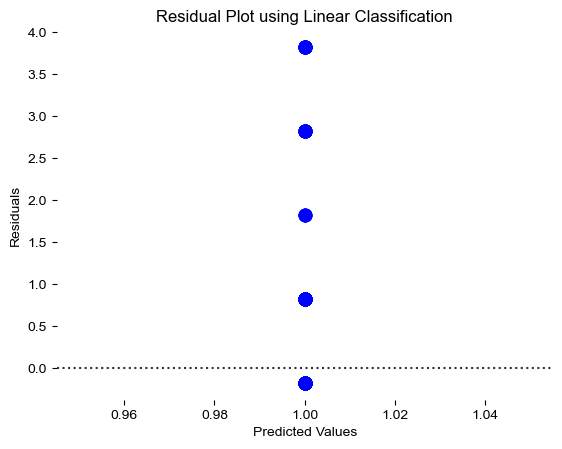

In [16]:
residuals = y_test - y_pred
sns.residplot(y_pred, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

## Linear classification model

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

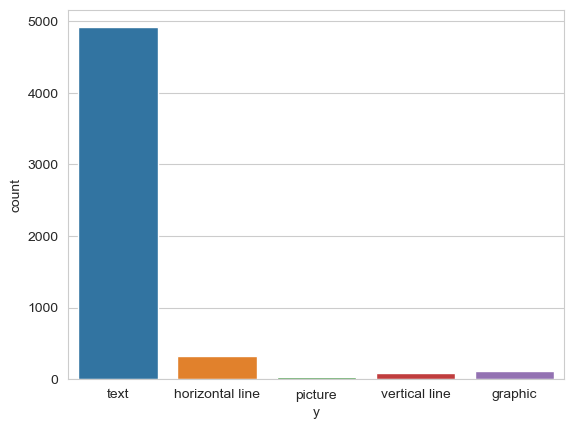

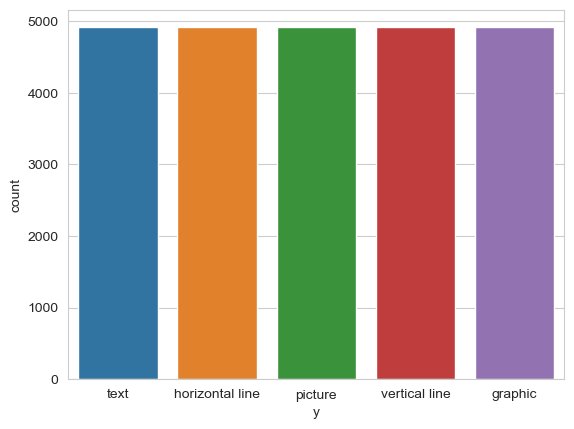

/Users/chandraprakashraoboinapally/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Users/chandraprakashraoboinapally/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Average Accuracy 0.9263174733833954
Standard deviation of Accuracy 0.005224762307588391
              precision    recall  f1-score   support

           1       0.86      0.84      0.85       990
           2       0.89      0.92      0.91       991
           3       0.98      1.00      0.99       968
           4       0.93      0.98      0.95       975
           5       0.91      0.83      0.87       989

    accuracy                           0.91      4913
   macro avg       0.91      0.92      0.91      4913
weighted avg       0.91      0.91      0.91      4913



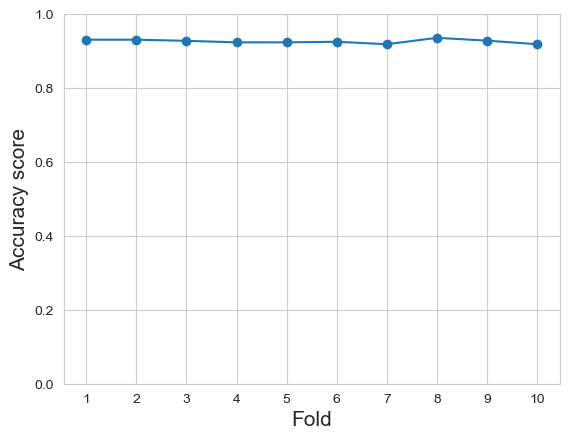

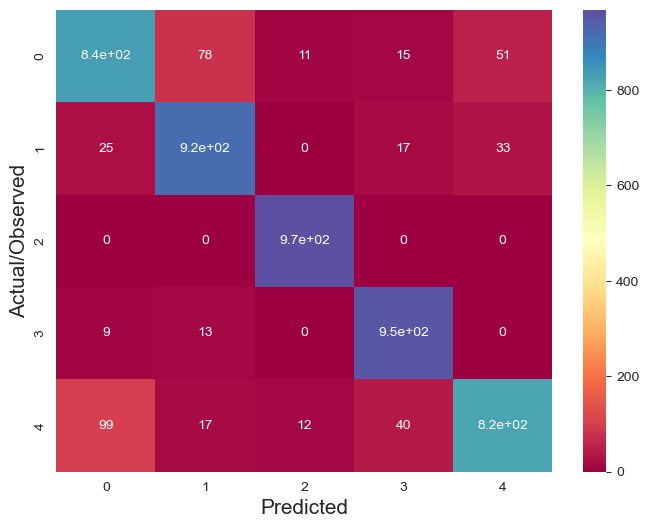

In [17]:
from ipynb.fs.full.Group_4_linear import y_test as y_test_linear, sgd_random_search as linear_model, X_test_scaled as X_test_linear

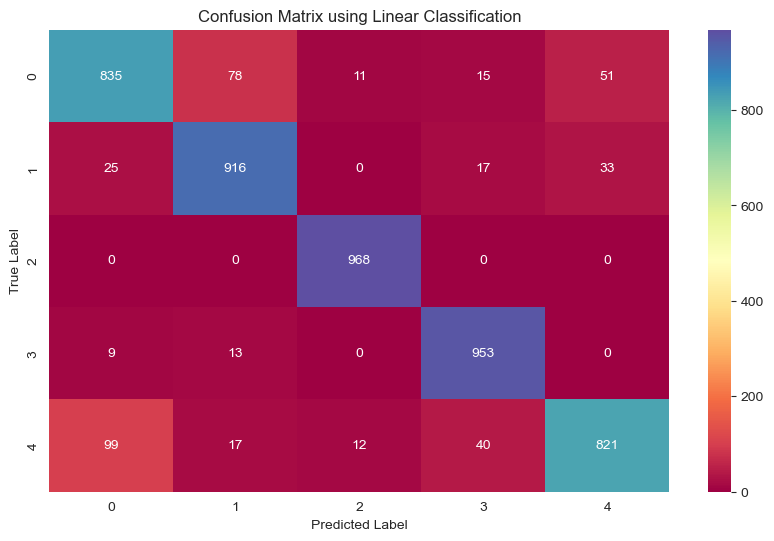

              precision    recall  f1-score   support

           1       0.86      0.84      0.85       990
           2       0.89      0.92      0.91       991
           3       0.98      1.00      0.99       968
           4       0.93      0.98      0.95       975
           5       0.91      0.83      0.87       989

    accuracy                           0.91      4913
   macro avg       0.91      0.92      0.91      4913
weighted avg       0.91      0.91      0.91      4913



In [18]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_linear=linear_model.predict(X_test_linear)
cm2 = confusion_matrix(y_test_linear, y_pred_linear)
sns.heatmap(cm2, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using Linear Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

print(classification_report(y_test_linear, y_pred_linear))

ac2=accuracy_score(y_test_linear,y_pred_linear)

report=classification_report(y_pred_linear,y_test_linear,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

### Residue Plot

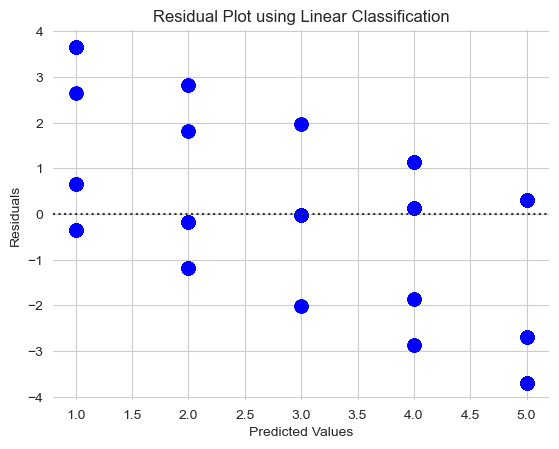

In [19]:
residuals = y_test_linear - y_pred_linear
sns.residplot(y_pred_linear, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

## KNN model 

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

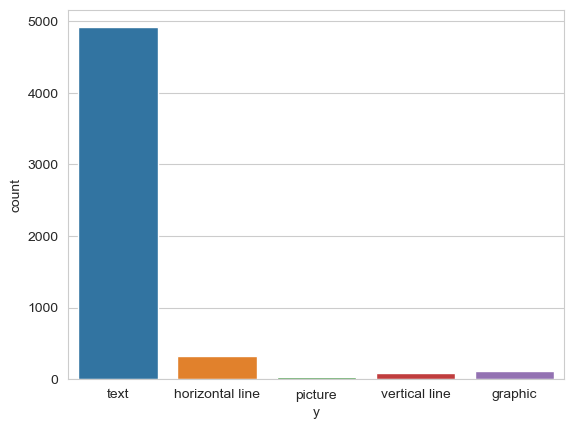

The best hyperparameters: {'weights': 'uniform', 'n_neighbors': 3}
The best score: 0.9878465760651975
Average Accuracy 0.9904335795029496
Standard deviation of Accuracy 0.0025827551535705364
              precision    recall  f1-score   support

           1       1.00      0.97      0.99       990
           2       0.99      0.99      0.99       991
           3       1.00      1.00      1.00       968
           4       0.99      0.99      0.99       975
           5       0.98      1.00      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



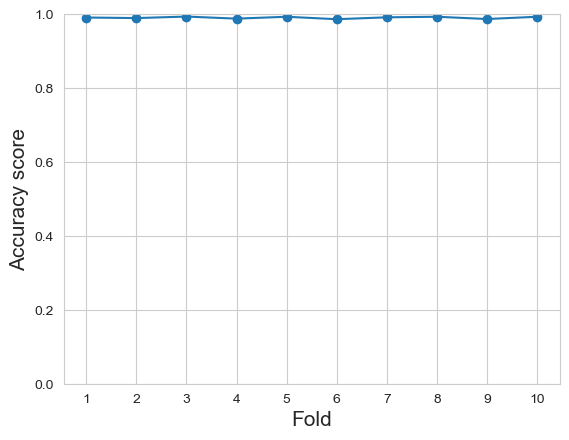

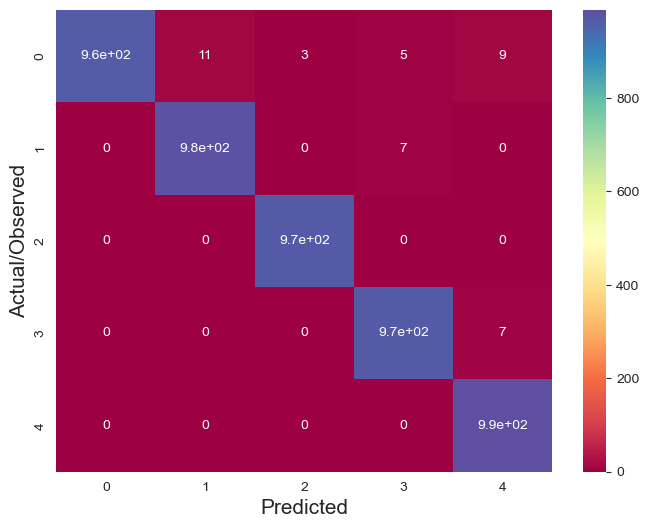

In [20]:
from ipynb.fs.full.Group_4_knn import y_test as y_test_knn, knn as knn_model, X_test_scaled as X_test_knn

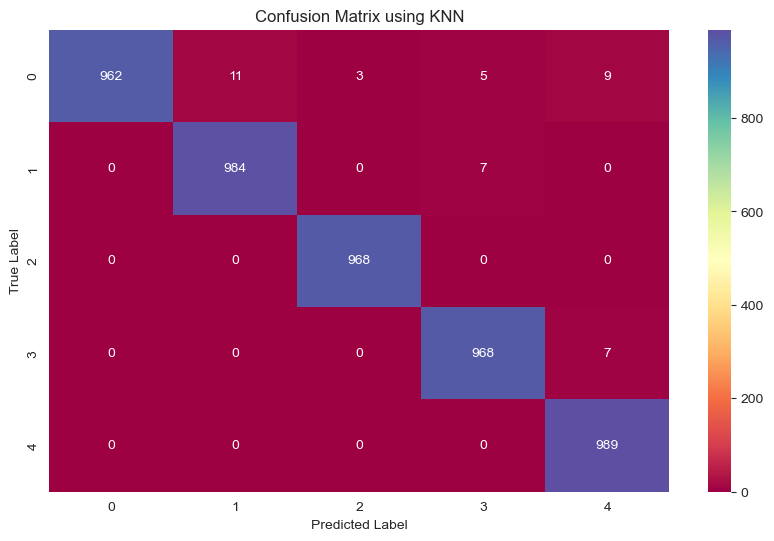

              precision    recall  f1-score   support

           1       1.00      0.97      0.99       990
           2       0.99      0.99      0.99       991
           3       1.00      1.00      1.00       968
           4       0.99      0.99      0.99       975
           5       0.98      1.00      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



In [21]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_knn=knn_model.predict(X_test_knn)
cm3 = confusion_matrix(y_test_knn, y_pred_knn)
sns.heatmap(cm3, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

print(classification_report(y_test_knn, y_pred_knn))

ac3=accuracy_score(y_test_knn,y_pred_knn)

report=classification_report(y_pred_knn,y_test_knn,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

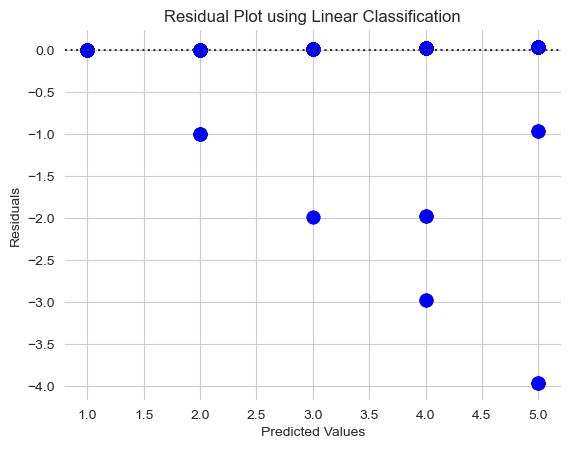

In [22]:
residuals = y_test_knn - y_pred_knn
sns.residplot(y_pred_knn, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

## Random Forest Model

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

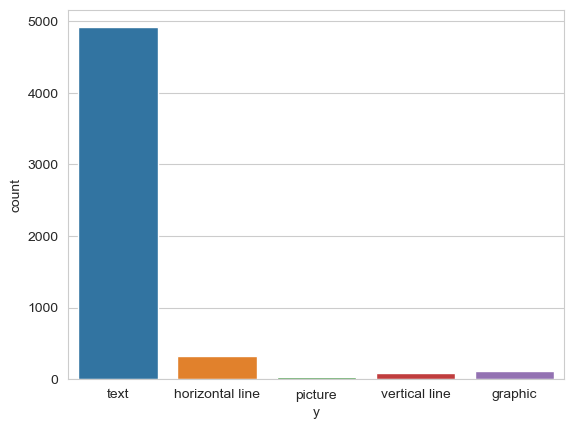

The best hyperparameters: {'n_estimators': 30, 'max_features': 'log2', 'max_depth': 30}
The best score: 0.9939446417625153
Average Accuracy 0.9939446674898205
Standard deviation of Accuracy 0.0012554604020096408
              precision    recall  f1-score   support

           1       1.00      0.99      0.99       990
           2       0.99      0.99      0.99       991
           3       1.00      1.00      1.00       968
           4       0.98      1.00      0.99       975
           5       1.00      0.99      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



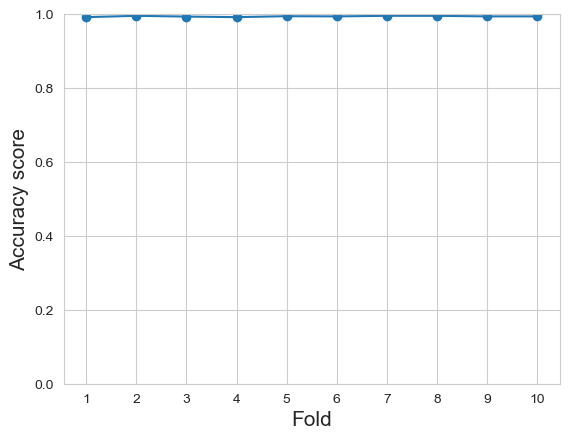

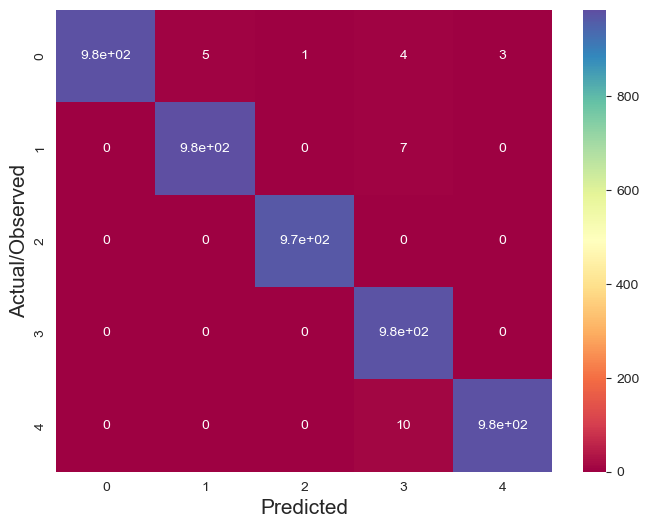

In [23]:
from ipynb.fs.full.Group_4_randomforest import y_test as y_test_forest, forest as forest_model, X_test as X_test_forest

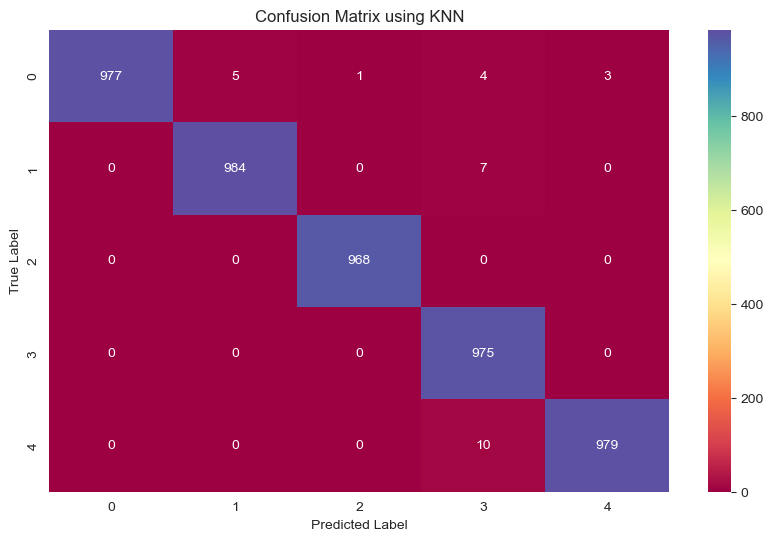

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       990
           2       0.99      0.99      0.99       991
           3       1.00      1.00      1.00       968
           4       0.98      1.00      0.99       975
           5       1.00      0.99      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



In [24]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_forest=forest_model.predict(X_test_forest)
cm4 = confusion_matrix(y_test_forest, y_pred_forest)
sns.heatmap(cm4, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test_forest, y_pred_forest))

ac4=accuracy_score(y_test_forest,y_pred_forest)

report=classification_report(y_pred_forest,y_test_forest,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

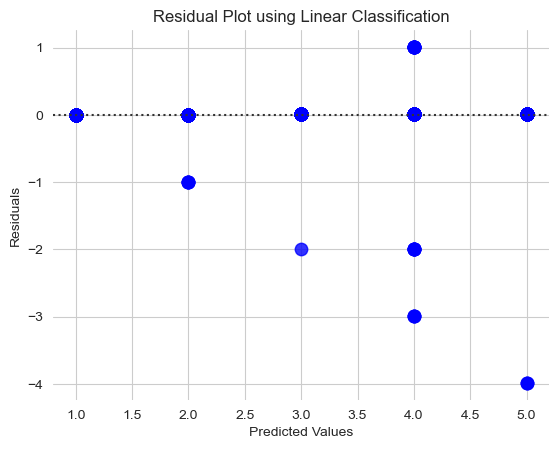

In [25]:
residuals = y_test_forest - y_pred_forest
sns.residplot(y_pred_forest, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

## Support Vector Machine model 

            height       length         area        eccen      p_black  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      8.491778    75.944089   678.280833     9.422260     0.355031   
std       2.958167    77.844052   760.273682     9.661801     0.139284   
min       2.500000     1.000000     7.000000     0.007000     0.052000   
25%       7.000000    17.000000   114.000000     2.143000     0.261000   
50%       8.000000    41.000000   322.000000     5.167000     0.337000   
75%      10.000000   107.000000   980.000000    13.625000     0.426000   
max      14.500000   242.000000  2279.000000    30.848000     0.673500   

             p_and      mean_tr     blackpix     blackand     wb_trans  \
count  5473.000000  5473.000000  5473.000000  5473.000000  5473.000000   
mean      0.786324     2.578667   198.322310   492.037365    86.901242   
std       0.166482     1.310313   208.242346   532.593288    92.165275   
min       0.307000     1.000000     7

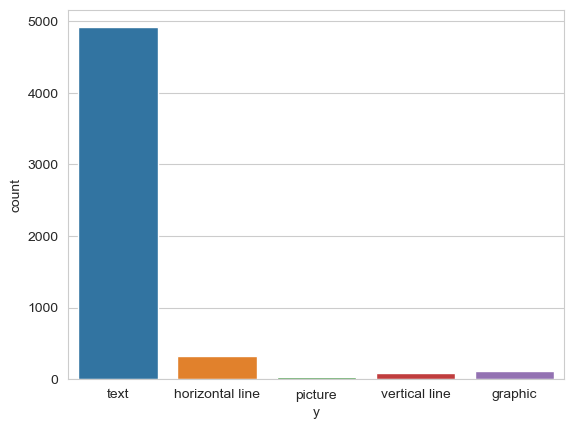

Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best hyperparameters: {'kernel': 'rbf', 'gamma': 1, 'C': 100}
The best score: 0.9848361591136674
SVC(C=100, gamma=1)
Average Accuracy 0.9853958516148571
Standard deviation of Accuracy 0.0023211939192106803
              precision    recall  f1-score   support

           1       1.00      0.97      0.98       990
           2       0.98      0.98      0.98       991
           3       1.00      1.00      1.00       968
           4       0.97      0.99      0.98       975
           5       0.98      0.99      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



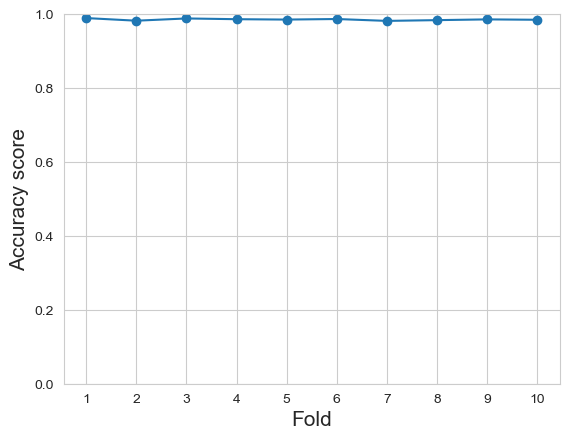

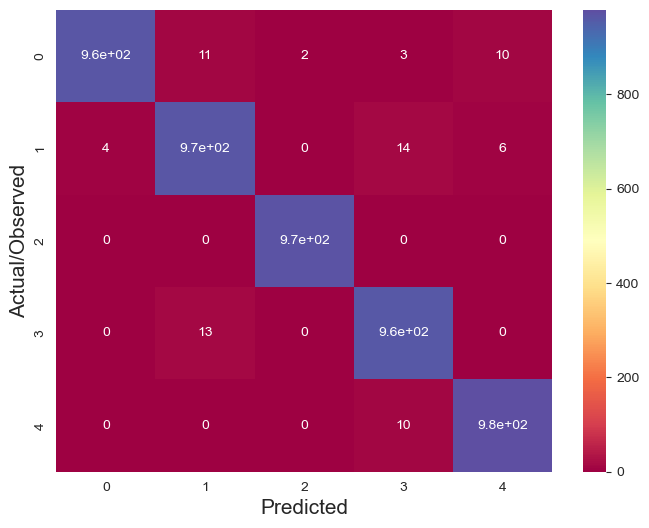

In [26]:
from ipynb.fs.full.Group_4_svm import y_test as y_test_svm, SVM as svm_model, X_test_scaled as X_test_svm

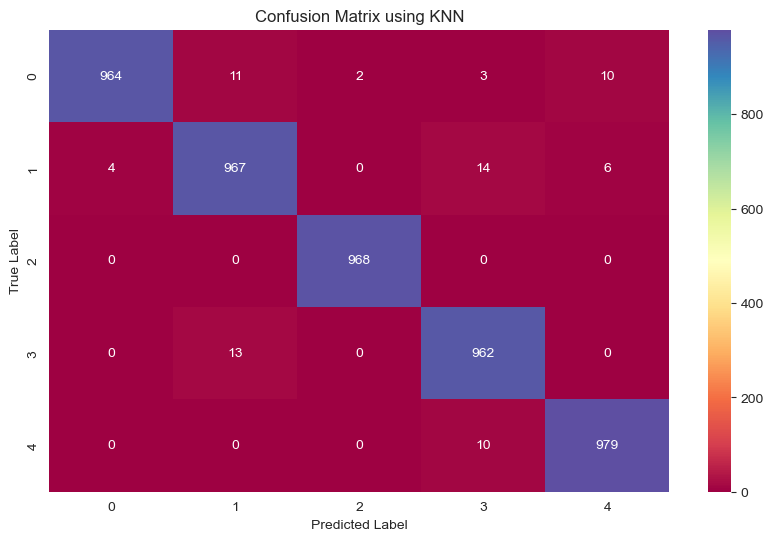

              precision    recall  f1-score   support

           1       1.00      0.97      0.98       990
           2       0.98      0.98      0.98       991
           3       1.00      1.00      1.00       968
           4       0.97      0.99      0.98       975
           5       0.98      0.99      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_svm=svm_model.predict(X_test_svm)
cm5 = confusion_matrix(y_test_svm, y_pred_svm)
sns.heatmap(cm5, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using KNN")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test_svm, y_pred_svm))

ac5=accuracy_score(y_test_svm,y_pred_svm)

report=classification_report(y_pred_svm,y_test_svm,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

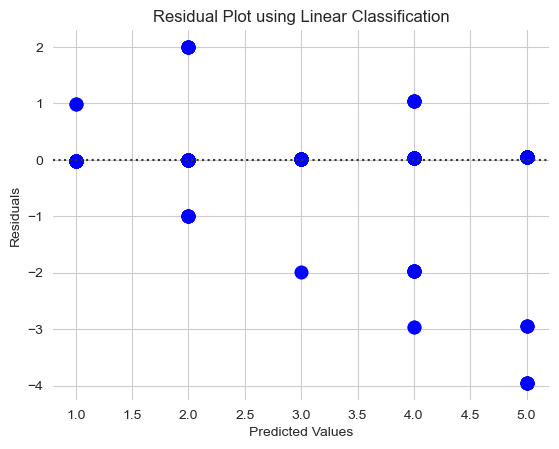

In [28]:
residuals = y_test_svm - y_pred_svm
sns.residplot(y_pred_svm, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

# SVM Linear

In [29]:
# SVM linear
X=df.iloc[:, :-1]
y=df['y']

oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
svc_linear = SVC(kernel='linear', C=1000, gamma=0.01)
svc_linear.fit(X_train_scaled, y_train)

SVC(C=1000, gamma=0.01, kernel='linear')

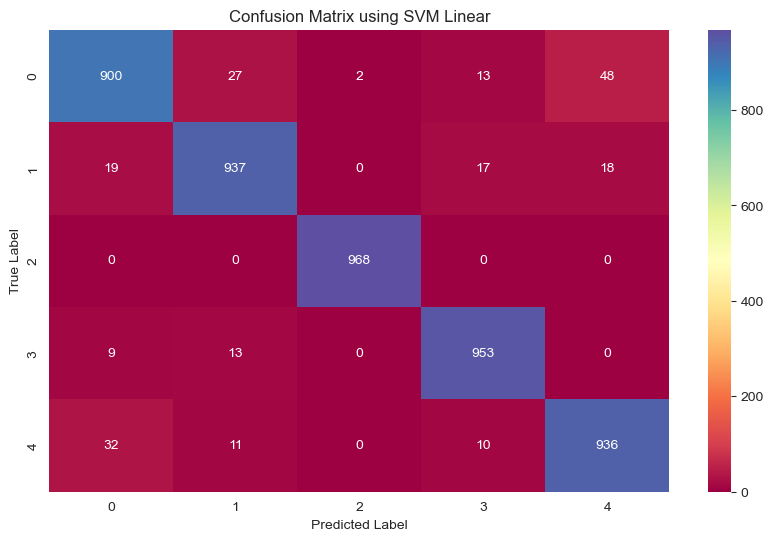

              precision    recall  f1-score   support

           1       0.94      0.91      0.92       990
           2       0.95      0.95      0.95       991
           3       1.00      1.00      1.00       968
           4       0.96      0.98      0.97       975
           5       0.93      0.95      0.94       989

    accuracy                           0.96      4913
   macro avg       0.96      0.96      0.96      4913
weighted avg       0.96      0.96      0.96      4913



In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_svm=svc_linear.predict(X_test_scaled)
cm6 = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm6, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using SVM Linear")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test, y_pred_svm))

ac6=accuracy_score(y_test,y_pred_svm)

report=classification_report(y_pred_svm,y_test,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

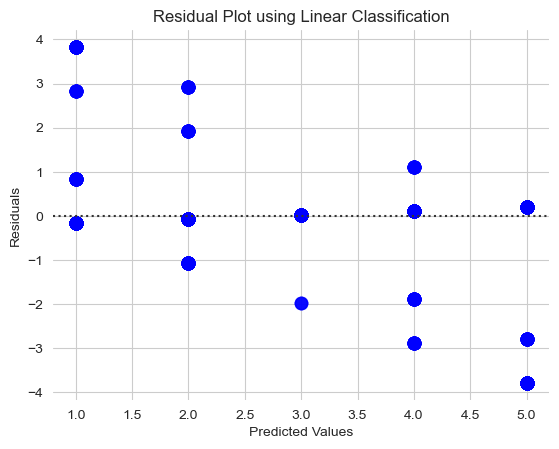

In [32]:
residuals = y_test - y_pred_svm
sns.residplot(y_pred_svm, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

# Deep Learning using MLP Classifier

In [33]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = 'adam',learning_rate = 'constant',
                    hidden_layer_sizes = (200,),
                    alpha = 0.001,
                    activation = 'relu')
clf.fit(X_train_scaled,y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=(200,))

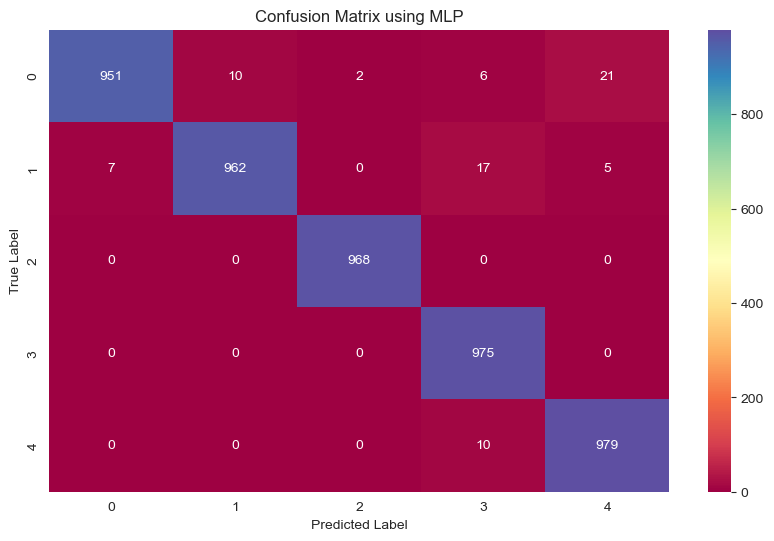

              precision    recall  f1-score   support

           1       0.99      0.96      0.98       990
           2       0.99      0.97      0.98       991
           3       1.00      1.00      1.00       968
           4       0.97      1.00      0.98       975
           5       0.97      0.99      0.98       989

    accuracy                           0.98      4913
   macro avg       0.98      0.98      0.98      4913
weighted avg       0.98      0.98      0.98      4913



In [34]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_mlp=clf.predict(X_test_scaled)
cm7 = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm7, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using MLP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test, y_pred_mlp))

ac7=accuracy_score(y_test,y_pred_mlp)

report=classification_report(y_pred_mlp,y_test,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

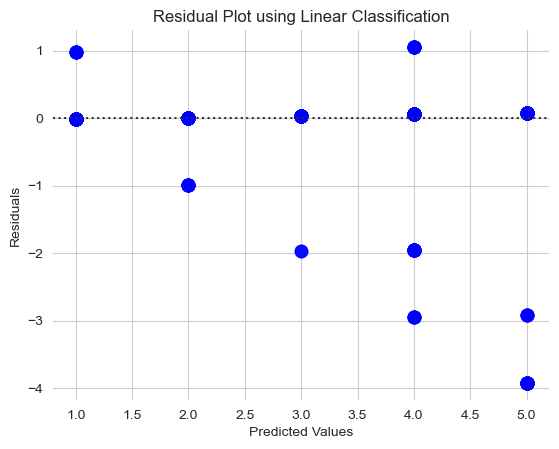

In [35]:
residuals = y_test - y_pred_mlp
sns.residplot(y_pred_mlp, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

# Extreme Machine Learning

In [36]:
from skelm import ELMClassifier

elm= ELMClassifier(n_neurons = 1000, alpha = 0.001, ufunc= 'relu')
elm.fit(X_train_scaled,y_train)

ELMClassifier(alpha=0.001, n_neurons=1000, ufunc='relu')

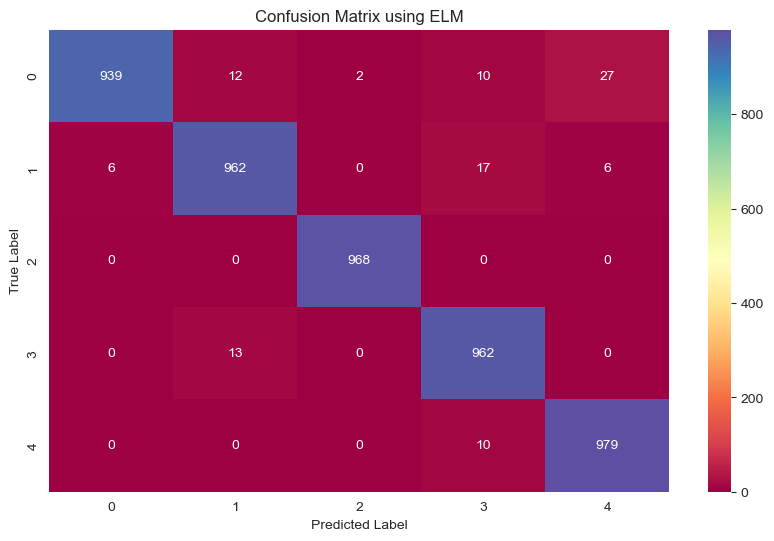

              precision    recall  f1-score   support

           1       0.99      0.95      0.97       990
           2       0.97      0.97      0.97       991
           3       1.00      1.00      1.00       968
           4       0.96      0.99      0.97       975
           5       0.97      0.99      0.98       989

    accuracy                           0.98      4913
   macro avg       0.98      0.98      0.98      4913
weighted avg       0.98      0.98      0.98      4913



In [37]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_elm=elm.predict(X_test_scaled)
cm8 = confusion_matrix(y_test, y_pred_elm)
sns.heatmap(cm8, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using ELM")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test, y_pred_elm))

ac8=accuracy_score(y_test,y_pred_elm)

report=classification_report(y_pred_elm,y_test,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

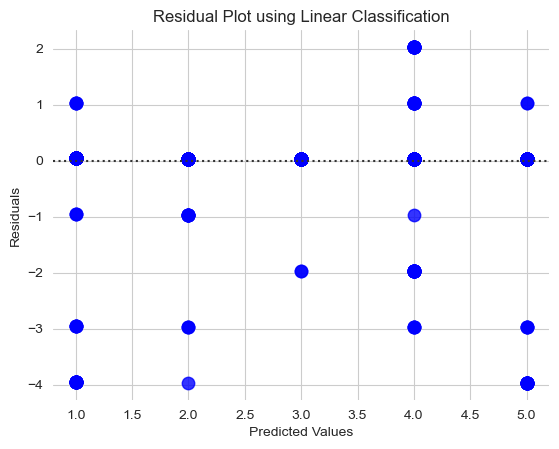

In [38]:
residuals = y_test - y_pred_elm
sns.residplot(y_pred_mlp, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

# First variable selection with best features using random Forest

In [39]:
X=df[['height', 'eccen', 'p_and', 'mean_tr', 'blackpix']]
y=df['y']

oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(max_depth = 50,
                                n_estimators = 20,
                                bootstrap = True,
                                max_features='sqrt')
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=20)

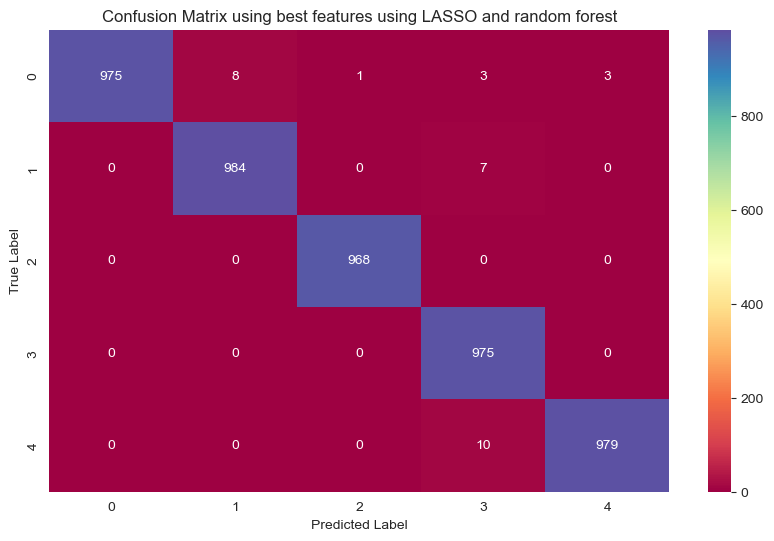

              precision    recall  f1-score   support

           1       1.00      0.98      0.99       990
           2       0.99      0.99      0.99       991
           3       1.00      1.00      1.00       968
           4       0.98      1.00      0.99       975
           5       1.00      0.99      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_forest=forest.predict(X_test)
cm9 = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm9, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using best features using LASSO and random forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test, y_pred_forest))

ac9=accuracy_score(y_test,y_pred_forest)

report=classification_report(y_pred_forest,y_test,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

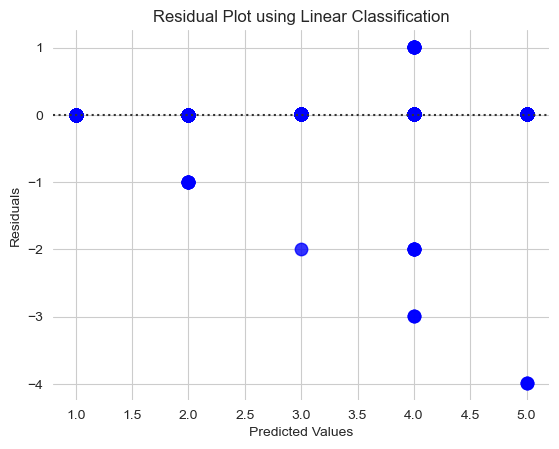

In [42]:
residuals = y_test - y_pred_forest
sns.residplot(y_pred_forest, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

# Bi Directional Feature selection best model Random forest

In [43]:
X=df[['length', 'area', 'eccen', 'p_black', 'p_and', 'mean_tr', 'wb_trans']]
y=df['y']

oversampler = RandomOverSampler(random_state=42)
X, y = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
forest = RandomForestClassifier(max_depth = 50,
                                n_estimators = 20,
                                bootstrap = True,
                                max_features='sqrt')
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=20)

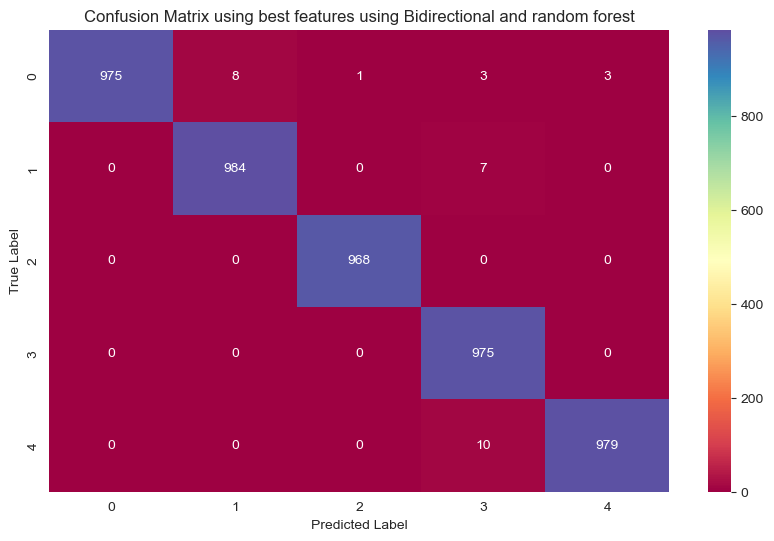

              precision    recall  f1-score   support

           1       1.00      0.99      0.99       990
           2       0.99      0.99      0.99       991
           3       1.00      1.00      1.00       968
           4       0.98      1.00      0.99       975
           5       1.00      0.99      0.99       989

    accuracy                           0.99      4913
   macro avg       0.99      0.99      0.99      4913
weighted avg       0.99      0.99      0.99      4913



In [45]:
fig, ax = plt.subplots(figsize=(10, 6))
y_pred_forest=forest.predict(X_test)
cm10 = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cm9, annot=True, cmap='Spectral', fmt='g')
plt.title("Confusion Matrix using best features using Bidirectional and random forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()
print(classification_report(y_test, y_pred_forest))

ac10=accuracy_score(y_test,y_pred_forest)

report=classification_report(y_pred_forest,y_test,output_dict=True)
precision.append(report['weighted avg']['precision'])
recall.append(report['weighted avg']['recall'])
f1_score.append(report['weighted avg']['f1-score'])

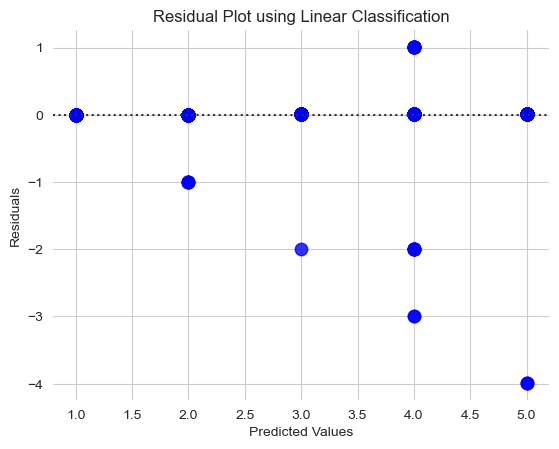

In [46]:
residuals = y_test - y_pred_forest
sns.residplot(y_pred_forest, residuals, scatter_kws={'s': 80}, line_kws={'lw': 2}, color='blue')
plt.title("Residual Plot using Linear Classification")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
sns.set_style("whitegrid")
sns.despine(left=True, bottom=True)
plt.show()

## Accuracy Plot for all the Models

In [47]:
model_name=['Naive','Linear','KNN','Random Forest', 'SVM','SVM Linear','MLP','ELM','LASSO','Bi-directional']
accuracy=[ac1,ac2,ac3,ac4,ac5,ac6,ac7,ac8,ac9,ac10]

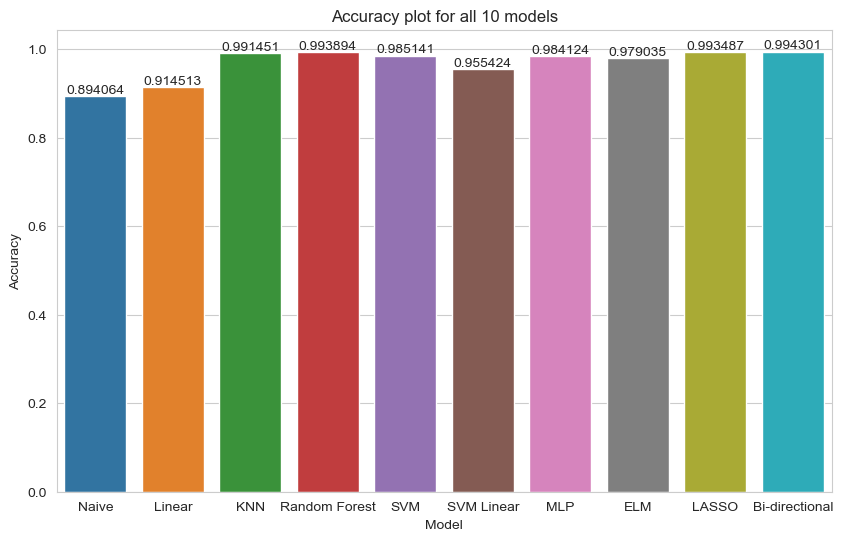

In [48]:
# sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x=model_name, y=accuracy)
for i in ax.containers:
    ax.bar_label(i, label_type='edge', fontsize=10)
plt.xticks(range(len(model_name)), model_name)
plt.title("Accuracy plot for all 10 models")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

## Precision, Recall, F1-Score for all the models

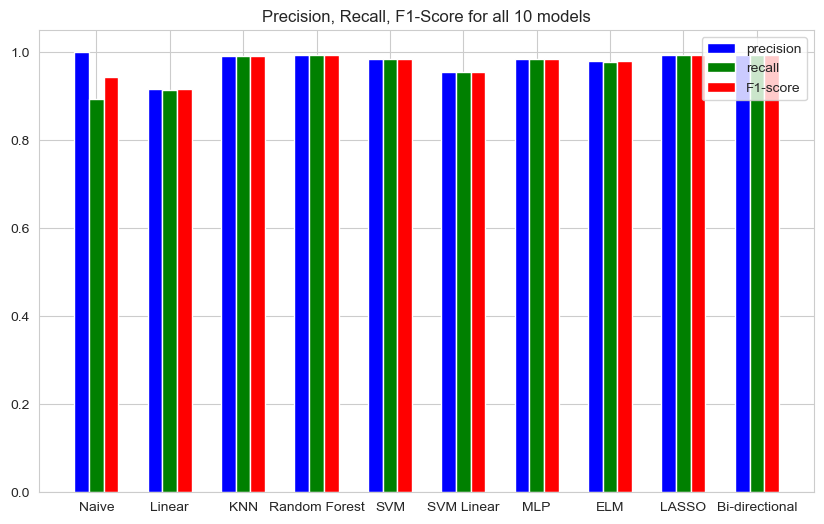

In [49]:
fig, ax = plt.subplots(figsize=(10,6))
x_pos = np.arange(10)
bar_width = 0.2
ax.bar(x_pos,precision, width=bar_width, color='b')
ax.bar(x_pos+bar_width, recall, width=bar_width, color='g')
ax.bar(x_pos+2*bar_width, f1_score, width=bar_width, color='r')
plt.title("Precision, Recall, F1-Score for all 10 models")
ax.set_xticks(x_pos+1*bar_width)
ax.set_xticklabels(model_name)
ax.legend(['precision','recall','F1-score'])

## True Postives percentage for each model for each class 

In [50]:
true_positives=[[],[],[],[],[],[],[],[],[],[]]
cm=[cm1,cm2,cm3,cm4,cm5,cm6,cm7,cm8,cm9,cm10]
for i in range(len(cm)):
    for j in range(5):
        true_positives[i].append(cm[i][j][j])


In [51]:
print(y_test.value_counts())

true_positives

2    991
1    990
5    989
4    975
3    968
Name: y, dtype: int64


[[979, 0, 0, 0, 0],
 [835, 916, 968, 953, 821],
 [962, 984, 968, 968, 989],
 [977, 984, 968, 975, 979],
 [964, 967, 968, 962, 979],
 [900, 937, 968, 953, 936],
 [951, 962, 968, 975, 979],
 [939, 962, 968, 962, 979],
 [975, 984, 968, 975, 979],
 [979, 984, 968, 975, 979]]

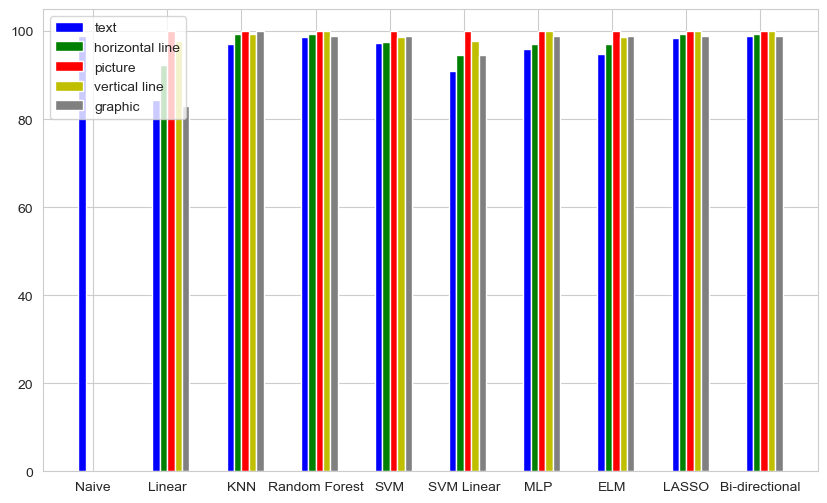

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
x_pos = np.arange(10)
bar_width = 0.1
ax.bar(x_pos,[i[0]*100/990 for i in true_positives], width=bar_width, color='b')
ax.bar(x_pos+bar_width, [i[1]*100/991 for i in true_positives], width=bar_width, color='g')
ax.bar(x_pos+2*bar_width, [i[2]*100/968 for i in true_positives], width=bar_width, color='r')
ax.bar(x_pos+3*bar_width,[i[3]*100/975 for i in true_positives], width=bar_width, color='y')
ax.bar(x_pos+4*bar_width, [i[4]*100/989 for i in true_positives], width=bar_width, color='grey')


ax.set_xticks(x_pos+1.5*bar_width)
ax.set_xticklabels(model_name)
ax.legend(['text','horizontal line','picture','vertical line', 'graphic'])

In [53]:
l=[accuracy,precision,recall,f1_score]
final_df=pd.DataFrame(data= l, index = ["Accuracy",'Precision', 'Recall', 'F1_score'], columns= model_name)

In [54]:
final_df

,Naive,Linear,KNN,Random Forest,SVM,SVM Linear,MLP,ELM,LASSO,Bi-directional
Accuracy,0.894064,0.914513,0.991451,0.993894,0.985141,0.955424,0.984124,0.979035,0.993487,0.994301
Precision,1.000000,0.917380,0.991599,0.993946,0.985209,0.955788,0.984461,0.979418,0.993546,0.994343
Recall,0.894064,0.914513,0.991451,0.993894,0.985141,0.955424,0.984124,0.979035,0.993487,0.994301
F1_score,0.944069,0.915408,0.991470,0.993886,0.985139,0.955538,0.984154,0.979069,0.993482,0.994294


[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.910 total time=  10.4s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.458 total time=  41.1s
[CV 1/5] END ........C=100, gamma=1, kernel=rbf;, score=0.987 total time=   1.6s
[CV 5/5] END ........C=100, gamma=1, kernel=rbf;, score=0.983 total time=   1.5s
[CV 5/5] END ..........C=1, gamma=1, kernel=rbf;, score=0.966 total time=   2.6s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.857 total time=  21.4s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.475 total time=  40.9s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.842 total time=  21.8s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.472 total time=  41.4s
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.852 total time=  22.5s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.979 total time=   2.9s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.975 total time=   2.5s
[CV 3/5] END .....C=1000, ga